In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
xl = pd.ExcelFile('C:/Users/Timothy/Desktop/Oct_2015/Bob/Canon_Sensor_Sensitivity.xlsx')
xl.sheet_names

C:\Users\Timothy\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Bad key "axis.grid" on line 8 in
C:\Users\Timothy\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\ourstyle.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


[u'Blue', u'Green', u'Red']

In [2]:
blue, green, red = xl.parse('Blue'), xl.parse('Green'), xl.parse('Red'), 

red.head(2)

,414.09,27.10026
0,414.6771,15.17614
1,431.7025,15.17614


In [3]:
blue = blue.rename(columns={412.1219: 'Wavelength', 14.46578:'Response'})
green = green.rename(columns={412.3288: 'Wavelength', 15.17614:'Response'})
red = red.rename(columns={414.09: 'Wavelength', 27.10026:'Response'})


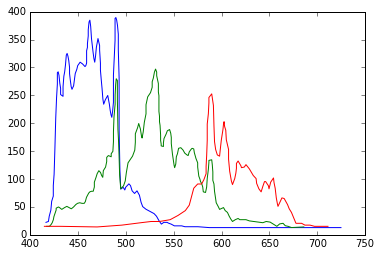

In [4]:
plt.plot(blue['Wavelength'], blue['Response'])
plt.plot(green['Wavelength'], green['Response'])
plt.plot(red['Wavelength'], red['Response'])

In [5]:
lps = pd.ExcelFile('C:/Users/Timothy/Desktop/Oct_2015/Bob/Light_Sources.xlsx')
lps.sheet_names

[u'LPS', u'Sheet2', u'Sheet3']

In [6]:
lps = lps.parse('LPS')[200:3500]

In [7]:
lps.head(3)

,Wavelength,Radiant power
200,400.0,0.000346
201,400.1,0.000334
202,400.2,0.000286


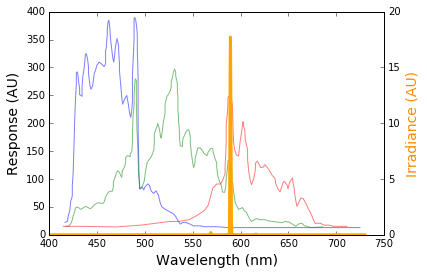

In [8]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(blue['Wavelength'], blue['Response'], 'b-', alpha = .5)
ax1.plot(green['Wavelength'], green['Response'], 'g-', alpha = .5)
ax1.plot(red['Wavelength'], red['Response'], 'r-', alpha = .5)
ax2.plot(lps['Wavelength'], lps['Radiant power'], color='orange', linewidth = 3)

ax1.set_xlabel('Wavelength (nm)', fontsize = 14)
ax1.set_ylabel('Response (AU)', fontsize = 14)
ax2.set_ylabel('Irradiance (AU)', color='darkorange', fontsize = 14)
ax2.set_ylim(0, 20)

plt.show()

In [9]:
eyes = pd.ExcelFile('C:/Users/Timothy/Desktop/Oct_2015/Bob/Eye_Response.xlsx')
eyes.sheet_names

[u'Eye_Response', u'Reference', u'Sheet3']

In [10]:
eyes = eyes.parse('Eye_Response')
eyes.head()

,l-bar,m-bar,s-bar
390,0.159002,0.124135,0.622941
395,0.365521,0.293005,1.409855
400,0.787325,0.652716,3.153771
405,1.580103,1.351508,6.816850
410,2.851082,2.528598,12.971498


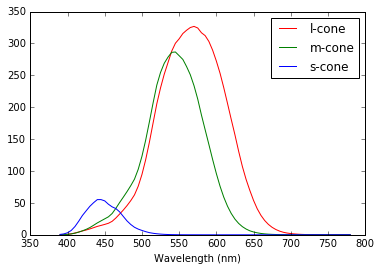

In [11]:
wl = range(390, 785, 5)
plt.plot(wl, eyes['l-bar'], 'r-', label = 'l-cone')
plt.plot(wl, eyes['m-bar'], 'g-', label = 'm-cone')
plt.plot(wl, eyes['s-bar'], 'b-', label = 's-cone')
plt.legend()
plt.xlabel('Wavelength (nm)')